### **Loading the data and libraries and Forecast**

17:39:02 - cmdstanpy - INFO - Chain [1] start processing
17:39:02 - cmdstanpy - INFO - Chain [1] done processing
17:39:03 - cmdstanpy - INFO - Chain [1] start processing
17:39:04 - cmdstanpy - INFO - Chain [1] done processing
17:39:05 - cmdstanpy - INFO - Chain [1] start processing
17:39:05 - cmdstanpy - INFO - Chain [1] done processing
17:39:06 - cmdstanpy - INFO - Chain [1] start processing
17:39:07 - cmdstanpy - INFO - Chain [1] done processing
17:39:08 - cmdstanpy - INFO - Chain [1] start processing
17:39:08 - cmdstanpy - INFO - Chain [1] done processing
17:39:10 - cmdstanpy - INFO - Chain [1] start processing
17:39:10 - cmdstanpy - INFO - Chain [1] done processing


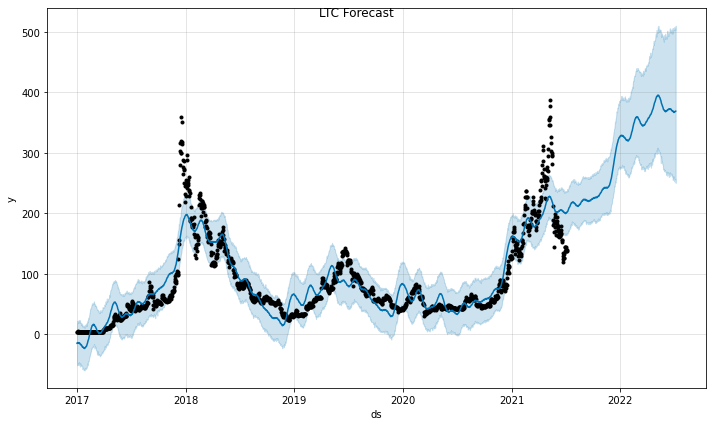

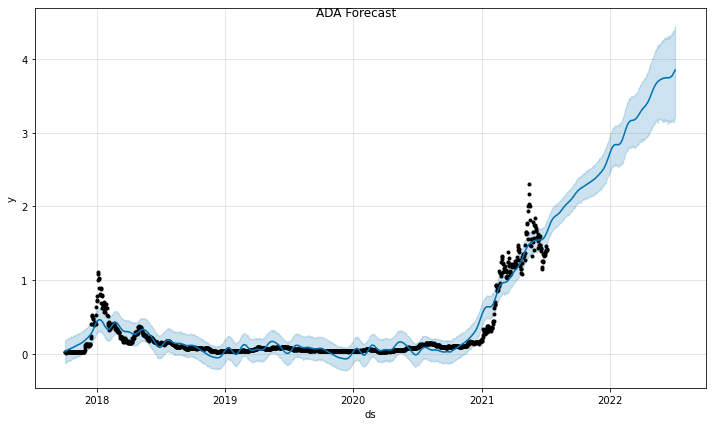

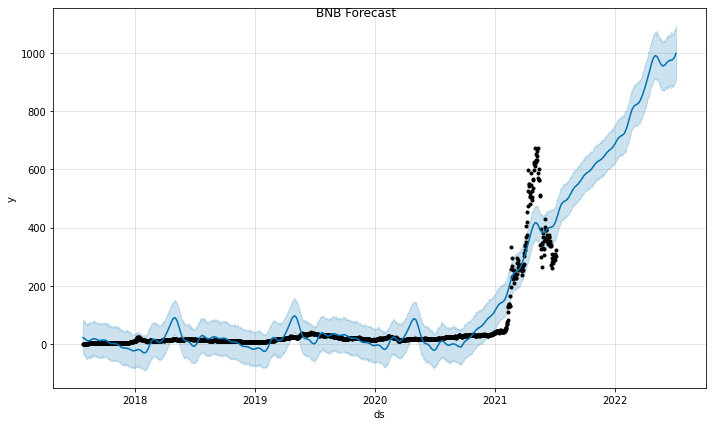

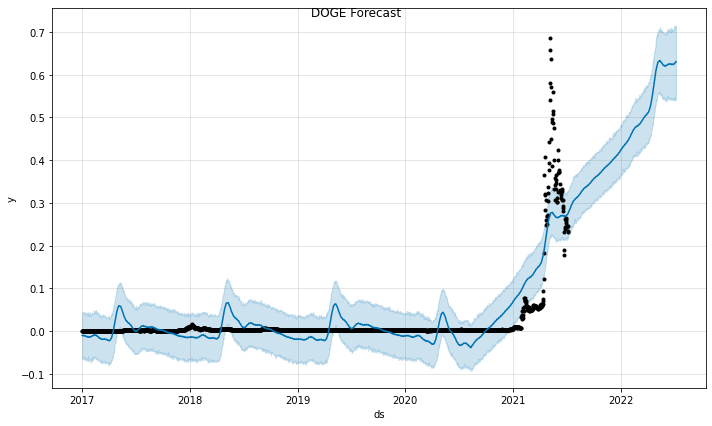

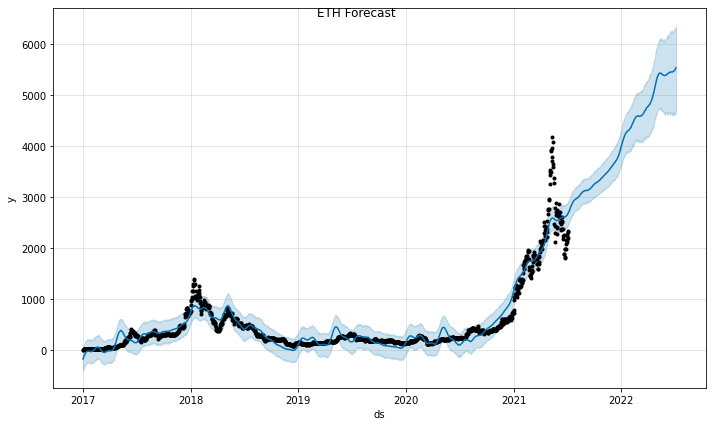

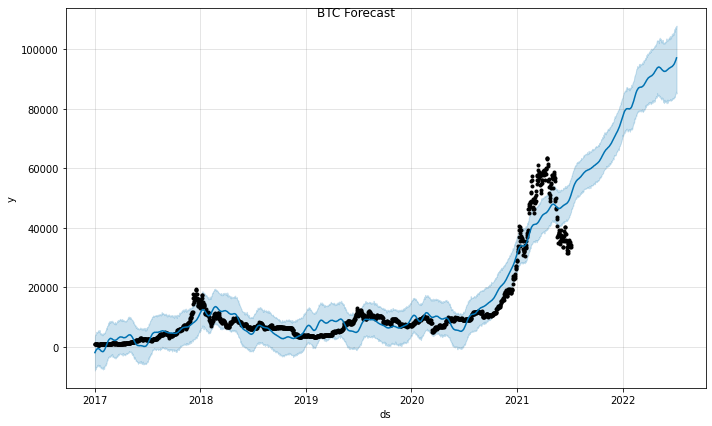

In [1]:
#import libraries
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv('sixcrypto.csv')

# Split the dataset based on the cryptocurrency symbol
crypto_symbols = df['Symbol'].unique()

for symbol in crypto_symbols:
    crypto_data = df[df['Symbol'] == symbol]

    # Prepare the data for Prophet
    crypto_data = crypto_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
    
    # Fit the Prophet model
    model = Prophet()
    model.fit(crypto_data)
    
    # Make a future dataframe for the next 365 days
    future = model.make_future_dataframe(periods=365)
    
    # Make predictions
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    fig.suptitle(f'{symbol} Forecast')


### **Prophte Model Evaluation**

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from scipy.stats import pearsonr

# Load data
df = pd.read_csv('sixcrypto.csv')

# Group data by symbol
symbol_groups = df.groupby('Symbol')

# Create an empty dictionary to store evaluation metrics for each symbol
metrics_dict = {}

# Loop through each symbol and fit a Prophet model
for symbol, symbol_df in symbol_groups:
    # Create Prophet model
    model = Prophet()
    # Train model on symbol data
    model.fit(symbol_df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'}))
    # Generate future dates for predictions
    future = model.make_future_dataframe(periods=365)
    # Make predictions
    forecast = model.predict(future)
    # Compute evaluation metrics
    mae = mean_absolute_error(symbol_df['Close'], forecast.loc[:len(symbol_df)-1, 'yhat'])
    mse = mean_squared_error(symbol_df['Close'], forecast.loc[:len(symbol_df)-1, 'yhat'])
    rmse = mse**0.5
    corr_coef, _ = pearsonr(symbol_df['Close'], forecast.loc[:len(symbol_df)-1, 'yhat'])
    
    # Store evaluation metrics for the symbol in the metrics dictionary
    metrics_dict[symbol] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'Correlation Coefficient': corr_coef}

# Convert the metrics dictionary to a pandas DataFrame and print it
metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

17:39:19 - cmdstanpy - INFO - Chain [1] start processing
17:39:20 - cmdstanpy - INFO - Chain [1] done processing
17:39:21 - cmdstanpy - INFO - Chain [1] start processing
17:39:21 - cmdstanpy - INFO - Chain [1] done processing
17:39:22 - cmdstanpy - INFO - Chain [1] start processing
17:39:23 - cmdstanpy - INFO - Chain [1] done processing
17:39:24 - cmdstanpy - INFO - Chain [1] start processing
17:39:24 - cmdstanpy - INFO - Chain [1] done processing
17:39:25 - cmdstanpy - INFO - Chain [1] start processing
17:39:26 - cmdstanpy - INFO - Chain [1] done processing
17:39:27 - cmdstanpy - INFO - Chain [1] start processing
17:39:27 - cmdstanpy - INFO - Chain [1] done processing


              MAE           MSE         RMSE  Correlation Coefficient
ADA      0.079696  1.411654e-02     0.118813                 0.957108
BNB     28.227092  2.051562e+03    45.294176                 0.919720
BTC   3132.685535  1.992558e+07  4463.808284                 0.940730
DOGE     0.025833  1.754967e-03     0.041892                 0.850832
ETH    112.520038  3.143952e+04   177.311926                 0.961466
LTC     19.152992  7.745510e+02    27.830756                 0.908998
